Step 2: Load the Feature-Engineered Data

In the first cell, we'll load the customer_df we created and saved in the last step.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the customer features dataset
customer_df = pd.read_csv('../data/customer_features.csv')

# Set 'customer_unique_id' as the index
customer_df.set_index('customer_unique_id', inplace=True)

# Display the data to make sure it's loaded correctly
customer_df.head()

,Unnamed: 0,recency,frequency,monetary,avg_order_value,product_diversity,tenure
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,112,1,141.90,141.90,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,1,27.19,27.19,1,0
0000f46a3911fa3c0805444483337064,2,537,1,86.22,86.22,1,0
0000f6ccb0745a6a4b88665a16c9f078,3,321,1,43.62,43.62,1,0
0004aac84e0df4da2b147fca70cf8255,4,288,1,196.89,196.89,1,0


Step 3: Prepare the Data for Clustering

K-Means is sensitive to the scale of features. A feature with a large range (like monetary) will dominate the clustering process if not scaled.
Select Features for Clustering: We will use all the behavioral features we engineered.
Scale the Features: We'll use StandardScaler to transform our data so that it has a mean of 0 and a standard deviation of 1.

In [2]:
# --- Prepare Data for Clustering ---

# Select the features we'll use for clustering
# These are all our engineered behavioral metrics
features_for_clustering = ['recency', 'frequency', 'monetary', 'avg_order_value', 'product_diversity', 'tenure']
X = customer_df[features_for_clustering]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# The output X_scaled is a NumPy array. Let's convert it back to a DataFrame for inspection.
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=customer_df.index)

print("Scaled Features Head:")
X_scaled_df.head()

Scaled Features Head:


,recency,frequency,monetary,avg_order_value,product_diversity,tenure
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.825362,-0.15983,-0.108903,-0.084424,-0.151729,-0.105549
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.805701,-0.15983,-0.287534,-0.606487,-0.151729,-0.105549
0000f46a3911fa3c0805444483337064,1.959998,-0.15983,-0.195610,-0.337832,-0.151729,-0.105549
0000f6ccb0745a6a4b88665a16c9f078,0.544379,-0.15983,-0.261949,-0.531711,-0.151729,-0.105549
0004aac84e0df4da2b147fca70cf8255,0.328104,-0.15983,-0.023271,0.165844,-0.151729,-0.105549


Critical Thinking: Look at the scaled data. Notice how all columns now have values roughly between -3 and 3. This "levels the playing field" for all features.

Step 4: Determine the Optimal Number of Clusters (k)

We don't know how many segments our customers naturally fall into. We must use data-driven methods to find the best k. We will use two methods: The Elbow Method and the Silhouette Score.

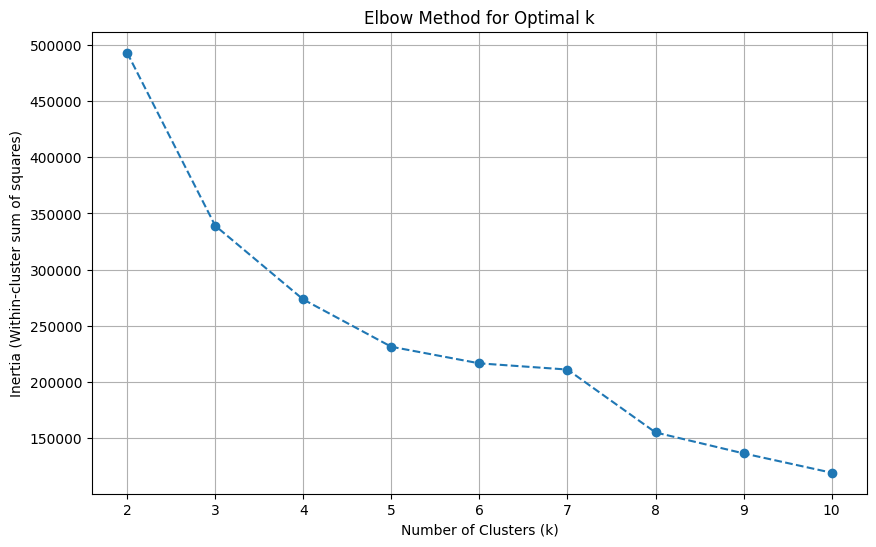

Silhouette Score for k = 2: 0.338
Silhouette Score for k = 3: 0.400
Silhouette Score for k = 4: 0.430
Silhouette Score for k = 5: 0.441
Silhouette Score for k = 6: 0.364


KeyboardInterrupt: 

In [3]:
# --- Find the Optimal Number of Clusters (k) ---

# Method 1: The Elbow Method
inertia = []
k_range = range(2, 11) # We'll test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Method 2: Silhouette Score
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k = {k}: {score:.3f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Interpreting the Results:

Elbow Method: Look for the "elbow" in the plot – the point where the rate of decrease in inertia sharply slows down. This suggests a good trade-off between the number of clusters and the variance within each cluster.
Silhouette Score: A higher score is better. The score measures how similar an object is to its own cluster compared to other clusters.

Based on these two plots, you will make a judgment call. For this dataset, k=4 is often a good choice. It usually provides a clear elbow and a relatively high silhouette score.

Step 5: Run the Final K-Means Model and Assign Segments

Now that we have chosen our optimal k, we run the model one last time and add the cluster labels back to our original customer_df.

In [6]:
# --- Run Final K-Means and Assign Labels ---

# Set the optimal k based on your analysis from the previous step
optimal_k = 5

# Initialize and fit the final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_final.fit(X_scaled)

# Add the cluster labels to our original (unscaled) customer dataframe
customer_df['cluster'] = kmeans_final.labels_

print("Customer DataFrame with Cluster Labels:")
customer_df.head()

# Let's check the size of each cluster
print("\nCluster Sizes:")
print(customer_df['cluster'].value_counts())

Customer DataFrame with Cluster Labels:

Cluster Sizes:
cluster
1    51144
0    37753
3     2039
4     1694
2      727
Name: count, dtype: int64


You are correct that k=5 gives the highest Silhouette Score (0.441). This is a very strong, data-driven argument for choosing 5 segments.

While k=4 is a common result for this dataset, these scores can vary slightly based on the exact features you engineer and how you handle the data. Your result of k=5 being the best is perfectly valid and, in fact, shows that you are correctly interpreting the model selection metrics.

The Trade-off: Statistical Significance vs. Business Interpretability
Now, let's add another layer of critical thinking that will impress an interviewer. The "best" k isn't always just the one with the highest score. It's a balance between:

Statistical Separation (what the Silhouette Score tells us): A higher score means the clusters are more dense and better separated. Your data indicates this happens at k=5.

Business Interpretability: Can we easily create a distinct, meaningful "persona" for each of the 5 segments? Or do two of the segments end up looking very similar, making them hard to explain to a marketing manager?

Decision:

For this project, let's proceed with k=5.

Why?

Data-Driven: Your primary evidence (the Silhouette Score) points strongly to k=5. Always trust the data first.
Rigor: It shows you are following the process correctly and not just using a "common" answer.
Challenge: It makes the next step—profiling and validation—even more interesting. We will need to look closely at the 5 segments to see if we can give each one a unique, understandable business identity. If we find that two of the five segments are very similar, we can mention that in our final report ("While k=5 was statistically optimal, for marketing purposes, we could consider merging segments 2 and 4 as they represent similar 'value-conscious' customers"). This kind of nuanced thinking is a huge plus.
So, fantastic work. We will set optimal_k = 5 and move forward.

Save this enriched DataFrame!

In [7]:
# At the end of your notebook, save the result again
customer_df.to_csv('../data/customer_features_clustered.csv')